# Importação de bibliotecas

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define o caminho do diretório base e o tamanho que as imagens vão ter

In [2]:
img_width, img_height = 32, 32
# Diretório onde estão as imagens
train_data_dir = r'C:\Users\eluar\Documents\Estudo_IA_Python\Classificacao_Ronilson_projeto\Pequi'

# Função para carregar a base e dividir em conjunto de treino e teste e difinir as labels 

In [3]:

def carregaBase(caminho, target_size, batch_size=32, split_ratio=0.7):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=(1 - split_ratio))

    # Gerador de dados de treinamento
    train_generator = datagen.flow_from_directory(
        caminho,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='grayscale',
        subset='training')  # Conjunto de treinamento
    
    # Gerador de dados de validação
    validation_generator = datagen.flow_from_directory(
        caminho,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='grayscale',
        subset='validation')  # Conjunto de validação
    
    return train_generator, validation_generator

# Carrega a base 

In [4]:
base_train, base_test = carregaBase(train_data_dir, target_size=(img_height, img_width))

# Imprime as conjunto de dados e classes 
class_indices = base_train.class_indices
print(class_indices)

Found 700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
{'Doente': 0, 'Saudavel': 1}


# Função para avaliar os modelos

In [5]:
def plotMatrizConfMD(matriz, modelo):
    #Plotar o grafico da matriz de confusão
    plt.figure(figsize=(8, 5))
    plt.title(f'Matriz de Confusao {modelo}')
    df_cm = pd.DataFrame(matriz, index=["DOENTE","SAUDAVEL"], columns=["DOENTE","SAUDAVEL"])
    ax = sns.heatmap(df_cm, cmap='Oranges', annot = True, fmt = '' )
    for text in ax.texts:
        text.set_text(f"{float(text.get_text())}")

    plt.show()

def avaliaModelo(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    
    # Calculando a especificidade
    conf_matrix = confusion_matrix(y_true, y_pred)
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    
    print(f'Acurácia: {accuracy}')
    print(f'Precisão: {precision}')
    print(f'Sensibilidade (Recall): {recall}')
    print(f'Especificidade: {specificity}')
    
    plotMatrizConfMD(conf_matrix, "LeNet")

# Função para criar a CNN LeNet

In [6]:
# Número de classes
num_classes = 2

def criaLeNet(x_train):
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(img_height, img_width, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compilando o modelo
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    # Treinando o modelo
    model.fit(x_train,
              #steps_per_epoch=len(train_generator),
              epochs=100, verbose=0) 
    # Aumentar número de épocas 
    return model



# Executa o modelo LeNet

In [7]:
LeNet = criaLeNet(base_train)

# Obtendo os valores das imgens e suas labels 

In [8]:
# Fazer previsões no conjunto de validação
x_test, y_test = zip(*(base_test[i] for i in range(len(base_test))))
x_test = np.concatenate(x_test)
y_test = np.concatenate(y_test)

# Realiza a Previsão 

In [9]:
# Prever as classes das imagens de validação
y_pred = LeNet.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Avalia o Modelo 

Acurácia: 0.7366666666666667
Precisão: 0.7458562260492174
Sensibilidade (Recall): 0.7366666666666667
Especificidade: 0.8333333333333334


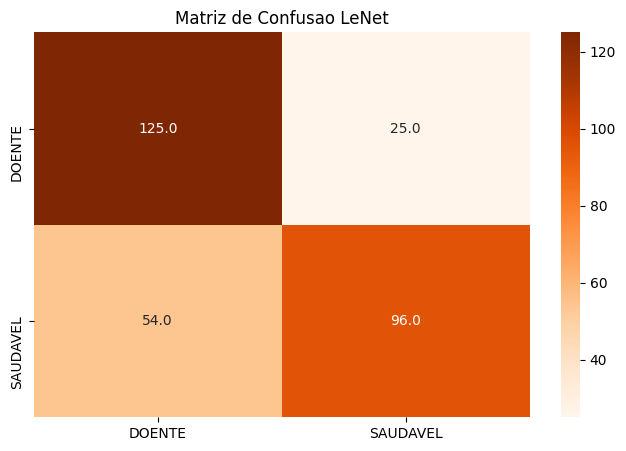

In [10]:
avaliaModelo(y_true_classes, y_pred_classes)